In [9]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

True

In [10]:
model = ChatOpenAI()

In [11]:
class LLMState(TypedDict):
    question: str
    answer: str
    

In [12]:
def llm_question(state : LLMState):
    question = state["question"]
    prompt = f"Answer this question with in one line{question}"
    answer = model.invoke(prompt).content
    state["answer"] = answer
    return state

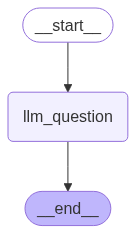

In [13]:
graph = StateGraph(LLMState)
graph.add_node('llm_question', llm_question)

graph.add_edge(START, "llm_question")
graph.add_edge("llm_question", END)

workflow = graph.compile()
workflow

In [17]:
workflow.invoke({"question": "What you know about Imran Khan?"})

{'question': 'What you know about Imran Khan?',
 'answer': 'Imran Khan is a former cricketer and the current Prime Minister of Pakistan.'}